In [ ]:
import pandas as pd
import numpy as np

In [ ]:
urineDS=pd.read_csv("/content/drive/MyDrive/Grad2/lastUrine.csv")
urineDS=urineDS.iloc[:,1:]

from sklearn.preprocessing import StandardScaler


urineOutput=urineDS.iloc[2:,0:1]
urineInput=urineDS.iloc[2:,4:]

data = urineInput
scaler = StandardScaler()
scaler.fit(data)
urineInput=scaler.transform(data)
'''
data = urineOutput
scaler = StandardScaler()
scaler.fit(data)
urineOutput=scaler.transform(data)
'''


'\ndata = urineOutput\nscaler = StandardScaler()\nscaler.fit(data)\nurineOutput=scaler.transform(data)\n'

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(urineInput, urineOutput, test_size=0.33, random_state=0)

In [ ]:
X_train=X_train.astype(np.float64)
X_test=X_test.astype(np.float64)
y_train=y_train.astype(np.float64)-1
y_test=y_test.astype(np.float64)-1

print(y_train)


     Metadata
231       1.0
20        1.0
169       0.0
254       1.0
126       0.0
..        ...
253       0.0
194       0.0
119       1.0
49        1.0
174       1.0

[201 rows x 1 columns]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten,concatenate

from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
import keras
from matplotlib import pyplot as plt

model = Sequential()
model.add(Conv1D(256, 3, activation='relu', input_shape=(8, 1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dropout(0.25))
model.add(Conv1D(64, 1, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dropout(0.5))
model.add(Flatten())
#model.add(Dense(16, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
x1=model.output

model2 = Sequential()
model2.add(Conv1D(256, 3, activation='relu', input_shape=(324, 1)))
model2.add(Conv1D(256, 3, activation='relu'))
model2.add(Dropout(0.25))
model2.add(MaxPooling1D(2))
model2.add(Conv1D(128, 3, activation='relu'))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.25))
model2.add(Conv1D(64, 3, activation='relu'))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.5))
model2.add(Flatten())
#model2.add(Dense(16, activation='relu'))
#model2.add(Dense(1, activation='sigmoid'))
#model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
x2=model2.output

model3 = Sequential()
model3.add(Conv1D(256, 3, activation='relu', input_shape=(197, 1)))
model3.add(Conv1D(256, 3, activation='relu'))
model3.add(Dropout(0.25))
model3.add(MaxPooling1D(2))
model3.add(Conv1D(128, 3, activation='relu'))
model3.add(MaxPooling1D(2))
model3.add(Dropout(0.25))
model3.add(Conv1D(64, 3, activation='relu'))
model3.add(MaxPooling1D(2))
model3.add(Dropout(0.5))
model3.add(Flatten())
#model3.add(Dense(16, activation='relu'))
#model3.add(Dense(1, activation='sigmoid'))
#model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
x3=model3.output








In [ ]:
model3.output

<KerasTensor: shape=(None, 1408) dtype=float32 (created by layer 'flatten_2')>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import keras
from keras.models import Sequential, Model
from keras.layers import GlobalAveragePooling2D, Dense, Input, Dropout, concatenate
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split

from math import ceil
import datetime

In [ ]:
x = concatenate([x3, x2,x1])
#x = Sequential()(x)
x = Dense(16, activation='relu')(x) 
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)


model4 = Model(inputs=[model3.input, model2.input,model.input], outputs=predictions) # Inputs go into 3 different layers
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model4.input

[<KerasTensor: shape=(None, 197, 1) dtype=float32 (created by layer 'conv1d_8_input')>,
 <KerasTensor: shape=(None, 324, 1) dtype=float32 (created by layer 'conv1d_4_input')>,
 <KerasTensor: shape=(None, 8, 1) dtype=float32 (created by layer 'conv1d_input')>]

Epoch 1/17
6/6 [==============================] - 8s 692ms/step - loss: 0.6859 - accuracy: 0.5167 - val_loss: 0.6297 - val_accuracy: 0.5714
Epoch 2/17
6/6 [==============================] - 4s 612ms/step - loss: 0.6567 - accuracy: 0.6333 - val_loss: 0.5716 - val_accuracy: 0.6667
Epoch 3/17
6/6 [==============================] - 4s 609ms/step - loss: 0.6013 - accuracy: 0.6444 - val_loss: 0.4682 - val_accuracy: 0.8571
Epoch 4/17
6/6 [==============================] - 4s 609ms/step - loss: 0.5552 - accuracy: 0.7111 - val_loss: 0.4435 - val_accuracy: 0.7619
Epoch 5/17
6/6 [==============================] - 4s 615ms/step - loss: 0.5590 - accuracy: 0.7111 - val_loss: 0.3833 - val_accuracy: 0.9048
Epoch 6/17
6/6 [==============================] - 4s 611ms/step - loss: 0.4330 - accuracy: 0.7889 - val_loss: 0.4188 - val_accuracy: 0.8095
Epoch 7/17
6/6 [==============================] - 4s 609ms/step - loss: 0.4508 - accuracy: 0.8000 - val_loss: 0.2880 - val_accuracy: 0.9048
Epoch 8/17
6/6 [====

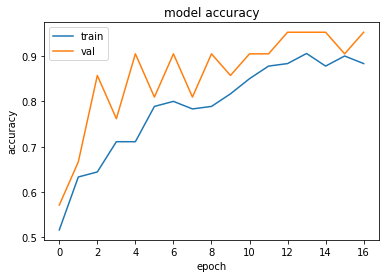

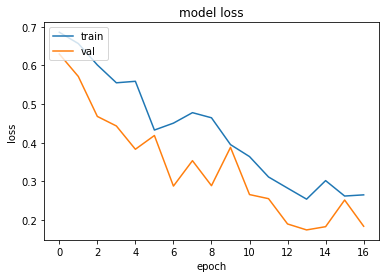

In [ ]:



history =model4.fit((X_train[:,:197],X_train[:,197:521],X_train[:,521:529]),y_train, batch_size=32, epochs=17, validation_split=0.1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)
model4.save('/content/drive/MyDrive/Grad2Models/cinsiyetLate')

2.8.2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Grad2Models/cinsiyetLate/assets


In [ ]:
import os

import tensorflow as tf
from tensorflow import keras
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Grad2Models/cinsiyetLate', compile=False)

# Check its architecture
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv1d_8_input (InputLayer)    [(None, 197, 1)]     0           []                               
                                                                                                  
 conv1d_4_input (InputLayer)    [(None, 324, 1)]     0           []                               
                                                                                                  
 conv1d_input (InputLayer)      [(None, 8, 1)]       0           []                               
                                                                                                  
 conv1d_8 (Conv1D)              (None, 195, 256)     1024        ['conv1d_8_input[0][0]']         
                                                                                              

In [ ]:
prediction=new_model.predict((X_test[:,:197],X_test[:,197:521],X_test[:,521:529]))

for i in range (prediction.shape[0]):
  if prediction[i]< 0.5:
    prediction[i]=0
  else:
    prediction[i]=1  
    

yout=y_test.to_numpy()    
counter=0


for i in range (prediction.shape[0]):
  print("pred",prediction[i],"---- Real",yout[i])
  if prediction[i] == yout[i] :
    counter=counter+1


print("Accuracy is ",counter,"%")


pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [1.]
pred [1.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [0.]
pred [1.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
cm = confusion_matrix(yout, prediction)

Text(0.5, 12.5, 'Predicted label')

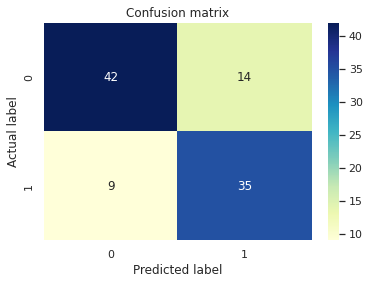

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yout,prediction))

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.79        56
         1.0       0.71      0.80      0.75        44

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.78      0.77      0.77       100



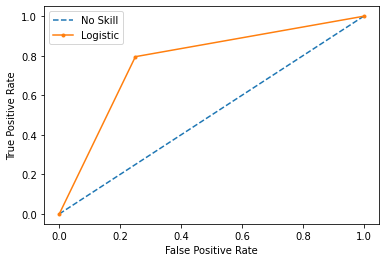

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(yout))]

ns_auc = roc_auc_score(yout, ns_probs)
lr_auc = roc_auc_score(yout, prediction)

ns_fpr, ns_tpr, _ = roc_curve(yout, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(yout, prediction)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()